In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
df_complete = pd.read_csv('/content/IPL.csv', sep= ',')

In [ ]:
df_complete.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df_18 = df_complete[df_complete['id'] >981019]
df_18.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
136530,1082591,1,7,2,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136531,1082591,1,7,3,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136532,1082591,1,7,4,MC Henriques,S Dhawan,TM Head,6,0,6,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136533,1082591,1,7,5,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136534,1082591,1,7,6,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore


In [ ]:
BallBowled_counts = df_18['bowler'].value_counts()
BallFaced_counts = df_18['batsman'].value_counts()

In [ ]:
BallBowled_counts = pd.DataFrame(BallBowled_counts)

BallBowled_counts.reset_index( inplace=True)


BallFaced_counts = pd.DataFrame(BallFaced_counts)

BallFaced_counts.reset_index( inplace=True)

In [ ]:
BallFaced_counts

,index,batsman
0,S Dhawan,1586
1,KL Rahul,1398
2,SS Iyer,1396
3,DA Warner,1380
4,V Kohli,1374
...,...,...
239,JL Denly,1
240,Y Prithvi Raj,1
241,Shahbaz Ahmed,1
242,S Lamichhane,1


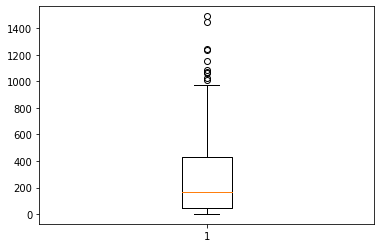

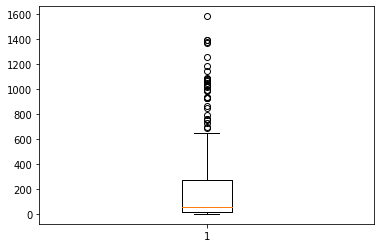

In [ ]:
fig,ax =plt.subplots()

ax.boxplot(BallBowled_counts['bowler'])

plt.show()

fig,ax =plt.subplots()

ax.boxplot(BallFaced_counts['batsman'])

plt.show()

In [ ]:
MedianBowl = BallBowled_counts['bowler'].median()

MedianBats = BallFaced_counts['batsman'].median()


In [ ]:
MedianBats

58.5

In [ ]:
Bowling_Targets = BallBowled_counts[BallBowled_counts['bowler']>MedianBowl]

Batting_Targets = BallFaced_counts[BallFaced_counts['batsman']>MedianBats]

In [ ]:
Bowling_Targets

,index,bowler
0,Rashid Khan,1490
1,JJ Bumrah,1448
2,YS Chahal,1240
3,SP Narine,1236
4,Sandeep Sharma,1155
...,...,...
89,KMA Paul,180
90,TK Curran,180
91,CJ Anderson,177
92,JO Holder,176


In [ ]:
wicket_pd = []

In [ ]:
for name in Bowling_Targets['index']:
  Bowlers = df_18[df_18['bowler']==name]
  #print(name)
  shape = Bowlers.shape
  #print(shape[0])
  #print(Bowlers['is_wicket'].sum())
  rate = round(((Bowlers['is_wicket'].sum()/shape[0])*100),1)
  wicket_pd.append([name,shape[0],Bowlers['is_wicket'].sum(),rate])


In [ ]:
colors = ['turquoise', 'crimson']

In [ ]:
def count_run(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

def Batsman_Analysis(Batter):
  filt=(df_18['batsman']==Batter)
  df_bat=df_18[filt]

  print("Dot Ball's :",len(df_bat[df_bat['batsman_runs']==0]))
  print("Runs scored from 1's :",count_run(df_bat,1))
  print("Runs scored from 2's :",count_run(df_bat,2))
  print("Runs scored from 3's :",count_run(df_bat,3))
  print("Runs scored from 4's :",count_run(df_bat,4))
  print("Runs scored from 6's :",count_run(df_bat,6))

  runs_total = df_bat['total_runs'].sum()
  balls_total = len(df_bat['batsman_runs'])
  
  print(" Runs per Ball :", round((runs_total/balls_total),2))





  values = df_bat['dismissal_kind'].value_counts()
  labels=df_bat['dismissal_kind'].value_counts().index
  fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
  fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
  fig.show()

In [ ]:
widgets.interact(Batsman_Analysis, Batter = Batting_Targets['index'])

interactive(children=(Dropdown(description='Batter', options=('S Dhawan', 'KL Rahul', 'SS Iyer', 'DA Warner', …

<function __main__.Batsman_Analysis>

In [ ]:
triall3 = []
for name in Batting_Targets['index']:
  x = df_18[df_18['batsman']==name]
  runs_total = x['total_runs'].sum()
  balls_total = len(x['batsman_runs'])
  runs_per_ball = round((runs_total/balls_total),2)
  wickets = len(x[x['is_wicket']==1])
  if runs_per_ball>=1.2:
    triall3.append([name,runs_per_ball,wickets])
triall4 = pd.DataFrame(triall3,columns= ['Name','Runs/Ball','Wickets'])

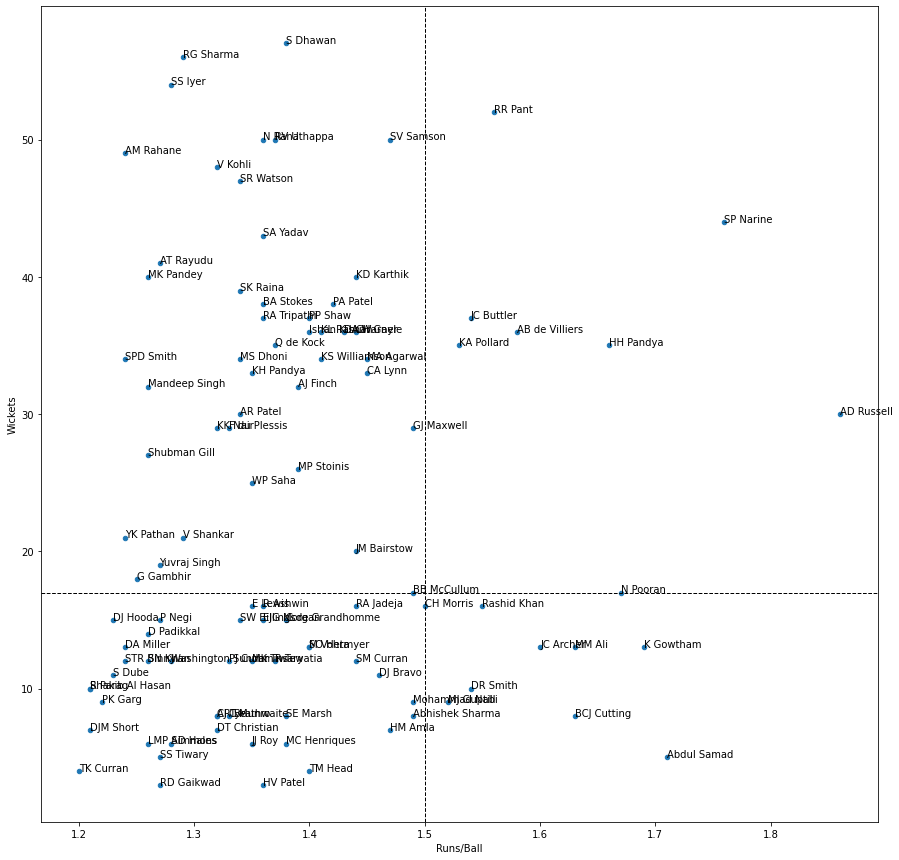

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
triall4.plot('Runs/Ball', 'Wickets', kind='scatter', ax=ax)

for i, txt in enumerate(triall4.Name):
    ax.annotate(txt, (triall4['Runs/Ball'].iat[i],triall4['Wickets'].iat[i]))

ax.axhline(y=triall4['Wickets'].median(), color='k', linestyle='--', linewidth=1)           
ax.axvline(x=1.5, color='k',linestyle='--', linewidth=1) 
 
plt.show()

In [ ]:
def count_bowl(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

def Bowler_Analysis(Bowler):
  filt=(df_18['bowler']==Bowler)
  df_bowl=df_18[filt]

  print("Dot Balls :",len(df_bowl[df_bowl['total_runs']==0]))
  print("Runs given from 1's :",count_bowl(df_bowl,1))
  print("Runs given from 2's :",count_bowl(df_bowl,2))
  print("Runs given from 3's :",count_bowl(df_bowl,3))
  print("Runs given from 4's :",count_bowl(df_bowl,4))
  print("Runs given from 6's :",count_bowl(df_bowl,6))
  print("Extras :",len(df_bowl[df_bowl['extra_runs']==1]))
  print("Wickets :",len(df_bowl[df_bowl['is_wicket']==1]))

  runs_total = df_bowl['total_runs'].sum()
  balls_total = len(df_bowl['batsman_runs'])
  
  print(" Runs per Ball :", round((runs_total/balls_total),2))




  values = df_bowl['dismissal_kind'].value_counts()
  labels=df_bowl['dismissal_kind'].value_counts().index
  fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
  fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
  fig.update_layout(title="Dismissal Type",
                  titlefont={'size': 30},
                  )
  fig.show()

In [ ]:
widgets.interact(Bowler_Analysis, Bowler = Bowling_Targets['index'])

interactive(children=(Dropdown(description='Bowler', options=('Rashid Khan', 'JJ Bumrah', 'YS Chahal', 'SP Nar…

<function __main__.Bowler_Analysis>

In [ ]:
triall = []


In [ ]:
for name in Bowling_Targets['index']:
  x = df_18[df_18['bowler']==name]
  runs_total = x['total_runs'].sum()
  balls_total = len(x['total_runs'])
  runs_per_ball = round((runs_total/balls_total),2)
  wickets = len(x[x['is_wicket']==1])
  triall.append([name,runs_per_ball,wickets])

In [ ]:
triall2 = pd.DataFrame(triall,columns= ['Name','Runs/Ball','Wickets'])
triall2

,Name,Runs/Ball,Wickets
0,Rashid Khan,1.06,80
1,JJ Bumrah,1.16,89
2,YS Chahal,1.24,66
3,SP Narine,1.25,46
4,Sandeep Sharma,1.27,58
...,...,...,...
89,KMA Paul,1.33,10
90,TK Curran,1.82,9
91,CJ Anderson,1.72,9
92,JO Holder,1.36,15


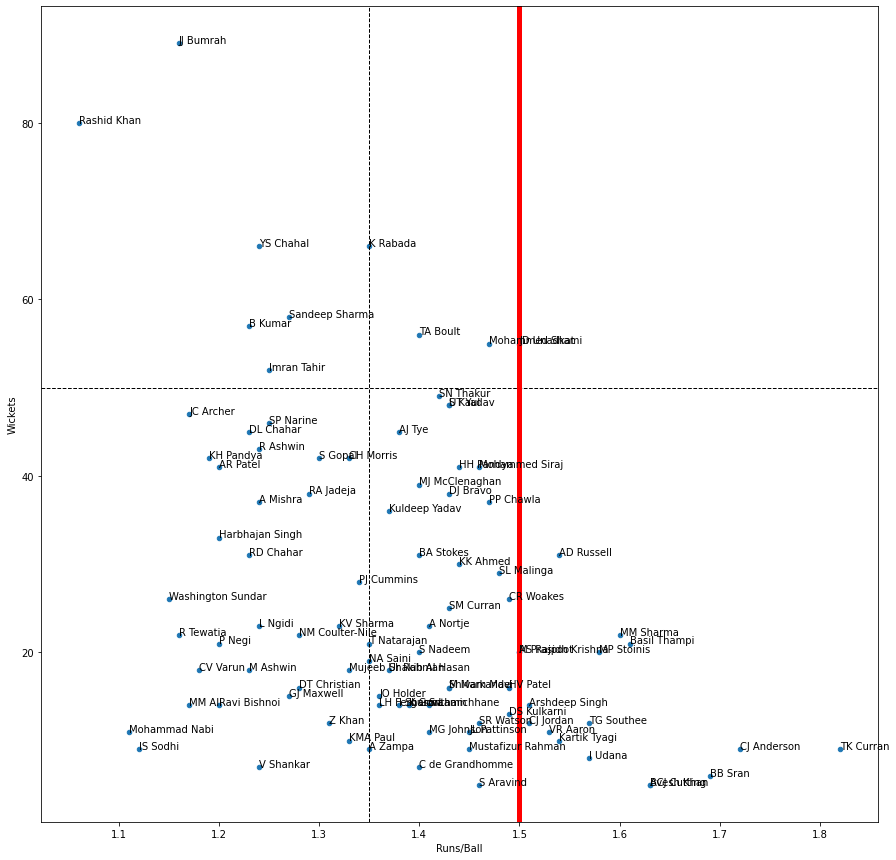

In [ ]:
#triall2.plot.scatter(x='Runs/Ball',y='Wickets')
#plt.scatter(x = triall2['Runs/Ball'],y = triall2['Wickets'])



fig, ax = plt.subplots(figsize = (15,15))
triall2.plot('Runs/Ball', 'Wickets', kind='scatter', ax=ax)

for i, txt in enumerate(triall2.Name):
    ax.annotate(txt, (triall2['Runs/Ball'].iat[i],triall2['Wickets'].iat[i]))

ax.axhline(y=50, color='k', linestyle='--', linewidth=1)           
ax.axvline(x=1.35, color='k',linestyle='--', linewidth=1) 
ax.axvline(x=1.5, color='red',linestyle='-', linewidth=5) 
plt.show()



# **MATCH ANALYSIS **

In [ ]:
df_match = pd.read_csv('/content/IPL Match.csv')

In [ ]:
df_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df_18_match = df_match[df_match['id'] >981019]
df_18_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
577,1082591,Hyderabad,2017-04-05,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,runs,35.0,N,NaN,AY Dandekar,NJ Llong
578,1082592,Pune,2017-04-06,SPD Smith,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Mumbai Indians,Rising Pune Supergiant,field,Rising Pune Supergiant,wickets,7.0,N,NaN,A Nand Kishore,S Ravi
579,1082593,Rajkot,2017-04-07,CA Lynn,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,N,NaN,Nitin Menon,CK Nandan
580,1082594,Indore,2017-04-08,GJ Maxwell,Holkar Cricket Stadium,0,Kings XI Punjab,Rising Pune Supergiant,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,AK Chaudhary,C Shamshuddin
581,1082595,Bengaluru,2017-04-08,KM Jadhav,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,15.0,N,NaN,S Ravi,VK Sharma


In [ ]:
  First_Innings=df_18[df_18['inning']==1]
  First_Innings.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
136530,1082591,1,7,2,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136531,1082591,1,7,3,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136532,1082591,1,7,4,MC Henriques,S Dhawan,TM Head,6,0,6,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136533,1082591,1,7,5,MC Henriques,S Dhawan,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore
136534,1082591,1,7,6,S Dhawan,MC Henriques,TM Head,1,0,1,0,0,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore


In [ ]:
#First_Innings.plot.bar(x = 'over',y = 'is_wicket')

for row in First_Innings:
  if First_Innings['is_wicket']==1:
    if First_Innings['ball'] == 1:
      count=+1
      print(count)


ValueError: ignored